In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob 
import tensorflow as tf
import PIL
from PIL import ImageDraw

from tensorflow.keras import models
from tensorflow.keras.models import Model,load_model,Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense,Flatten, Activation, BatchNormalization,Input,Add,ZeroPadding2D,AveragePooling2D,GlobalMaxPooling2D,MaxPool2D
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.resnet_v2 import ResNet152V2,ResNet50V2, preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions



In [5]:
train_path = 'D:\\빅데이터기반지능형서비스개발\\07기업요구사항기반의문제해결pjt\\data\\Train_data\\dry_scalp'
valid_path = 'D:\\빅데이터기반지능형서비스개발\\07기업요구사항기반의문제해결pjt\\data\\Validation\\dry_scalp'
test_path = 'D:\\빅데이터기반지능형서비스개발\\07기업요구사항기반의문제해결pjt\\data\\Test\\dry_scalp'

In [6]:
subject = train_path.split('/')[-1]
subject

'D:\\빅데이터기반지능형서비스개발\\07기업요구사항기반의문제해결pjt\\data\\Train_data\\dry_scalp'

In [7]:
labels=pd.Series(os.listdir(train_path))

labels=labels.sort_values()
labels=labels.to_list()
labels

['dry_scalp_0', 'dry_scalp_1', 'dry_scalp_2', 'dry_scalp_3']

In [80]:
image_height = 224  # 이미지 높이
image_width = 224   # 이미지 넓이
batch_size = 32     # batch size
epochs  = 2  # trining 횟수

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [53]:
# train_datagen 인스턴스를 통해 train dataset 에서 한번에 batch_size 만큼 이미지를 만들어내는 training_set 객체를 생성.
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(image_width, image_height),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')


# val_datagen 인스턴스를 통해 test dataset 에서 한번에 batch_size 만큼 이미지를 만들어내는 test_set 객체를 생성.
test_set = test_datagen.flow_from_directory(test_path,                                            
                                            target_size=(image_width, image_height),
                                            batch_size=batch_size,
                                            class_mode='categorical')

#val_datagen 인스턴스를 통해 val dataset 에서 한번에 batch_size 만큼 이미지를 만들어내는 val_set 객체를 생성.
val_set = val_datagen.flow_from_directory(valid_path,                                        
                                           target_size=(image_width, image_height),
                                           batch_size=batch_size,
                                           class_mode='categorical')

Found 20438 images belonging to 4 classes.
Found 1819 images belonging to 4 classes.
Found 3188 images belonging to 4 classes.


In [11]:
class_path = glob.glob(train_path + '/*')
class_path

['D:\\빅데이터기반지능형서비스개발\\07기업요구사항기반의문제해결pjt\\data\\Train_data\\dry_scalp\\dry_scalp_0',
 'D:\\빅데이터기반지능형서비스개발\\07기업요구사항기반의문제해결pjt\\data\\Train_data\\dry_scalp\\dry_scalp_1',
 'D:\\빅데이터기반지능형서비스개발\\07기업요구사항기반의문제해결pjt\\data\\Train_data\\dry_scalp\\dry_scalp_2',
 'D:\\빅데이터기반지능형서비스개발\\07기업요구사항기반의문제해결pjt\\data\\Train_data\\dry_scalp\\dry_scalp_3']

In [12]:
# 각각의 data set 이 만들어 내는 이미지의 클래스 인덱스 확인
print(f'train set의 이미지 클래스: {train_set.class_indices}')
print(f'test set의 이미지 클래스: {test_set.class_indices}')
print(f'validation set의 이미지 클래스: {val_set.class_indices}')

train set의 이미지 클래스: {'dry_scalp_0': 0, 'dry_scalp_1': 1, 'dry_scalp_2': 2, 'dry_scalp_3': 3}
test set의 이미지 클래스: {'dry_scalp_0': 0, 'dry_scalp_1': 1, 'dry_scalp_2': 2, 'dry_scalp_3': 3}
validation set의 이미지 클래스: {'dry_scalp_0': 0, 'dry_scalp_1': 1, 'dry_scalp_2': 2, 'dry_scalp_3': 3}


In [13]:
classNum = []
fileNum = []
for path in class_path :
    fileNum.append(len(glob.glob(path + '/*')))
    classNum.append(int(path.split('_')[-1]))

label_dic = dict(zip(classNum, fileNum))
label_dic

{0: 4588, 1: 4435, 2: 5486, 3: 5929}

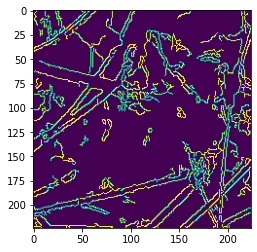

In [47]:
from matplotlib.pyplot import imshow
import cv2
ii=(train_set[0][0][-1]*255).astype(np.uint8)
d=cv2.Canny(ii, 100, 255)
ii[:,:,-1]=d
imshow(d)

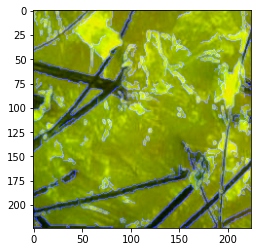

In [48]:
imshow(ii)


In [ ]:
ii=(train_set[0][0][-1]*255).astype(np.uint8)
d=cv2.Canny(ii, 100, 255)
ii[:,:,-1]=d

In [65]:
# image preprocessing
from matplotlib.pyplot import imshow
%matplotlib inline
for i in range(len(train_set)-1):
    print('i',i,end='\r')
    for j in range(32):
    
        ii=(train_set[i][0][j]*255).astype(np.uint8)
        d=cv2.Canny(ii, 100, 255)
        ii[:,:,-1]=d
        train_set[i][0][j] = ii

In [66]:
for i in range(len(val_set)-1):
    print('ii',i,end='\r')
    for j in range(32):
        ii=(val_set[i][0][j]*255).astype(np.uint8)
        d=cv2.Canny(ii, 100, 255)
        ii[:,:,-1]=d
        val_set[i][0][j] = ii

In [67]:
for i in range(len(test_set)-1):
    print('iii',i,end='\r')
    for j in range(32):
        ii=(test_set[i][0][j]*255).astype(np.uint8)
        d=cv2.Canny(ii, 100, 255)
        ii[:,:,-1]=d
        test_set[i][0][j] = ii

---

In [78]:
conv_base = ResNet50V2(include_top=False, weights = 'imagenet' ,input_shape=(224,224,3))
conv_base.summary()
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               12845184  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 516       
Total params: 36,410,500
Trainable params: 36,365,060
Non-trainable params: 45,440
_________________________________________________________________


In [81]:
# 50
opt = tf.keras.optimizers.Adam(learning_rate= 0.0001)

# 모델 학습시 가장 최신의 최고 모델을 저장하는 인스턴스를 정의
modelCheckpoint = ModelCheckpoint('logs/dry.h5', save_best_only=True)

# 모델 학습시 정확도를 모니터링하여 조기에 학습을 종료시키는 인스턴스 정의
monitor_val_acc = EarlyStopping(monitor='val_acc', patience=5)

# callback 정의
callbacks= [modelCheckpoint,monitor_val_acc]

model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['acc'])

history =model.fit(train_set,
                    epochs=epochs,
                    validation_data=val_set,
                    callbacks=callbacks
                   )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 639 steps, validate for 100 steps
Epoch 1/2
639/639 [==============================] - 309s 484ms/step - loss: 0.4203 - acc: 0.8242 - val_loss: 0.7334 - val_acc: 0.7155
Epoch 2/2
639/639 [==============================] - 234s 366ms/step - loss: 0.2882 - acc: 0.8858 - val_loss: 0.9330 - val_acc: 0.7215


---

In [82]:
(test_loss, test_accuracy) = model.evaluate(test_set, verbose=1)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy*100)

  ...
    to  
  ['...']
57/57 [==============================] - 13s 221ms/step - loss: 1.3573 - acc: 0.5596
Test loss: 1.3573335346422697
Test accuracy: 55.964815616607666


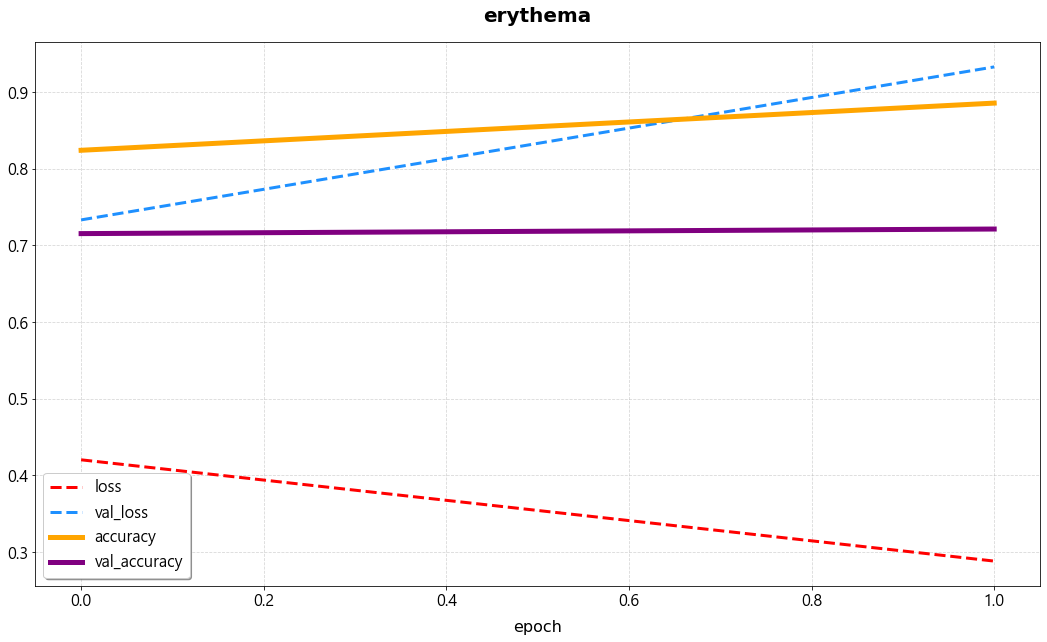

In [83]:
font1 = {'family': 'DejaVu Sans',
         'weight': 'bold',
         'size': 20
         }

font2 = {'family': 'DejaVu Sans',
         'size': 16
         }   

plt.figure(figsize=(18,10))

plt.plot(history.history['loss'], '--', c = 'red', label = 'loss', linewidth = 3)
plt.plot(history.history['val_loss'], '--', c = 'dodgerblue', label = 'val_loss', linewidth = 3)
plt.plot(history.history['acc'], c='orange',label = 'accuracy', linewidth = 5)
plt.plot(history.history['val_acc'],c='purple',label = 'val_accuracy', linewidth = 5)


plt.legend(['loss', 'val_loss','accuracy','val_accuracy'],shadow = True, loc='best',fontsize = 16)
plt.title('erythema', fontdict=font1, pad = 20)
plt.xlabel('epoch', fontdict=font2, labelpad=10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, alpha=0.5, linestyle='--')
plt.show()

---

In [72]:
from tensorflow.keras.models import load_model
model=load_model('logs/dry.h5')

In [84]:
dd = model.evaluate_generator(test_set,32)
dd

  ...
    to  
  ['...']


[1.3850166834890842, 0.55078125]

<AxesSubplot:>

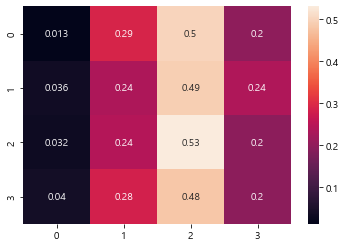

In [85]:
test_set.reset()
Y_pred = model.predict_generator(test_set)#validation_generator.n // validation_generator.batch_size+1)
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(Y_pred, axis=1) 

cm=confusion_matrix(test_set.classes, y_pred)
tot=np.sum(cm,axis=1)
cm1=cm/tot[:,None]
classes=['0','1','2','3']
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
df_cm = pd.DataFrame(cm1,
                     index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure()
sn.heatmap(df_cm, annot=True)